<a href="https://colab.research.google.com/github/Farah-Deeba-UNCC/Introduction-to-ML/blob/main/9-LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Problem statement
Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new outlet. The chain already has trucks in various cities and you have data for profits and populations from the cities. You would like to use this data to help you select which city to expand next.

## Load data
 The first column is the population of a city and the second column is the profit of a food truck in that city. A negative value for profit indicates a loss. The dataset is loaded from the data file into the variables x and y:

In [4]:

df =pd.read_csv('https://raw.githubusercontent.com/satishgunjal/datasets/master/univariate_profits_and_populations_from_the_cities.csv')
df.head() # To get first n rows from the dataset default value of n is 5

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [9]:
X = df.loc[:,'population']
Y = df.loc[:,'profit']

## Plot data
Before starting on any task, it is often useful to understand the data by visualizing it. For this dataset, we can use a scatter plot to visualize the data, since it has only two variables (profit and population) to plot (a simple linear regression problem) .

Note that many problems in real life are multi-dimensional (multiple linear regression problem) and can’t be plotted on a 2-d plot.

Now let's create a scatter plot of the data:

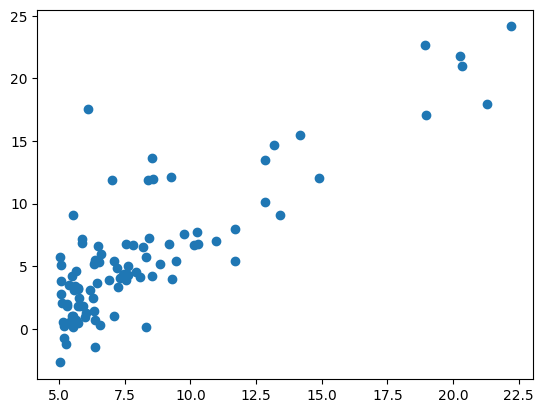

In [10]:
plt.scatter(X,Y)
plt.show()

Text(0.5, 1.0, 'Scatter plot of training data')

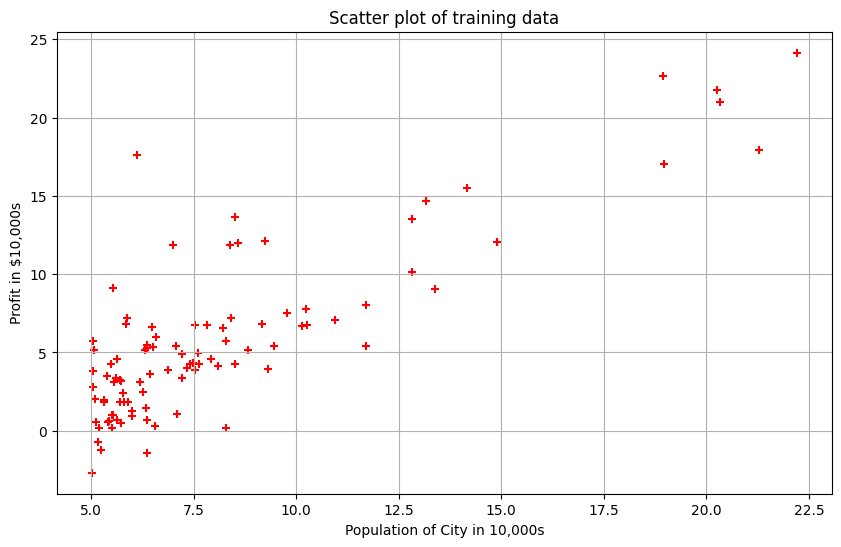

In [12]:
plt.scatter(X,Y, color='red',marker= '+')
plt.grid()
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.title('Scatter plot of training data')

In [ ]:

#Lets create a matrix with single column of ones
X_0 = np.ones((m, 1))
X_0[:5]

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [ ]:
# Using reshape function convert X 1D array to 2D array of dimension 97x1
X_1 = X.reshape(m, 1)
X_1[:10]

array([[6.1101],
       [5.5277],
       [8.5186],
       [7.0032],
       [5.8598],
       [8.3829],
       [7.4764],
       [8.5781],
       [6.4862],
       [5.0546]])

In [ ]:
# Lets use hstack() function from numpy to stack X_0 and X_1 horizontally (i.e. column
# This will be our final X matrix (feature matrix)
X = np.hstack((X_0, X_1))
X[:5]

array([[1.    , 6.1101],
       [1.    , 5.5277],
       [1.    , 8.5186],
       [1.    , 7.0032],
       [1.    , 5.8598]])

In [ ]:
theta = np.zeros(2)
theta

array([0., 0.])

In [ ]:
def compute_cost(X, y, theta):
  """
  Compute cost for linear regression.

  Input Parameters
  ----------------
  X : 2D array where each row represent the training example and each column represent
      m= number of training examples
      n= number of features (including X_0 column of ones)
  y : 1D array of labels/target value for each traing example. dimension(1 x m)

  theta : 1D array of fitting parameters or weights. Dimension (1 x n)

  Output Parameters
  -----------------
  J : Scalar value.
  """
  predictions = X.dot(theta)
  errors = np.subtract(predictions, y)
  sqrErrors = np.square(errors)
  J = 1 / (2 * m) * np.sum(sqrErrors)

  return J

In [ ]:
# Lets compute the cost for theta values
cost = compute_cost(X, y, theta)
print('The cost for given values of theta_0 and theta_1 =', cost)

The cost for given values of theta_0 and theta_1 = 32.072733877455676


In [ ]:
def gradient_descent(X, y, theta, alpha, iterations):
  """
  Compute cost for linear regression.

  Input Parameters
  ----------------
  X : 2D array where each row represent the training example and each column represent
      m= number of training examples
      n= number of features (including X_0 column of ones)
  y : 1D array of labels/target value for each traing example. dimension(m x 1)
  theta : 1D array of fitting parameters or weights. Dimension (1 x n)
  alpha : Learning rate. Scalar value
  iterations: No of iterations. Scalar value.

  Output Parameters
  -----------------
  theta : Final Value. 1D array of fitting parameters or weights. Dimension (1 x n)
  cost_history: Conatins value of cost for each iteration. 1D array. Dimansion(m x 1)  """
  cost_history = np.zeros(iterations)

  for i in range(iterations):
    predictions = X.dot(theta)
    errors = np.subtract(predictions, y)
    sum_delta = (alpha / m) * X.transpose().dot(errors);
    theta = theta - sum_delta;
    cost_history[i] = compute_cost(X, y, theta)

  return theta, cost_history

In [ ]:
theta = [0., 0.]
iterations = 1500;
alpha = 0.01;

In [ ]:

theta, cost_history = gradient_descent(X, y, theta, alpha, iterations)
print('Final value of theta =', theta)
print('cost_history =', cost_history)

Final value of theta = [-3.63029144  1.16636235]
cost_history = [6.73719046 5.93159357 5.90115471 ... 4.48343473 4.48341145 4.48338826]


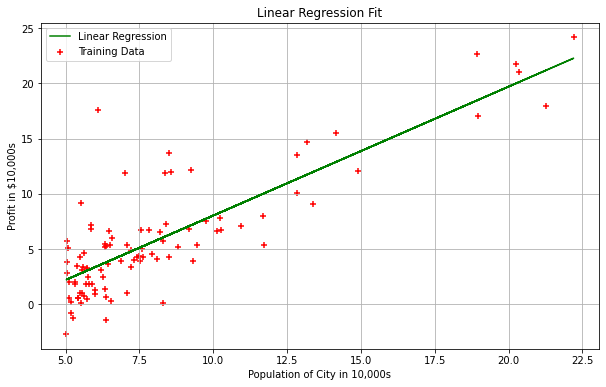

In [ ]:
# Since X is list of list (feature matrix) lets take values of column of index 1 only
plt.scatter(X[:,1], y, color='red', marker= '+', label= 'Training Data')
plt.plot(X[:,1],X.dot(theta), color='green', label='Linear Regression')

plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.title('Linear Regression Fit')
plt.legend()

Text(0.5, 1.0, 'Convergence of gradient descent')

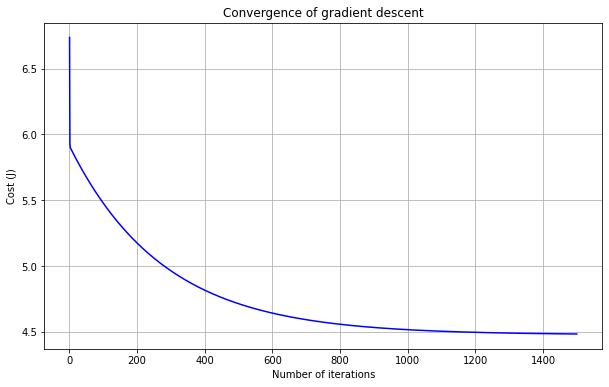

In [ ]:
plt.plot(range(1, iterations + 1),cost_history, color='blue')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent')